# Mahan Mirza Khanlari -- Computational -- Final Project

I used GPT 4o for all 3 and told it to be consice and creative.  

### Hogg & Foreman-Mackey, problem 2 (M-H algorithm with a Gaussian likelihood)

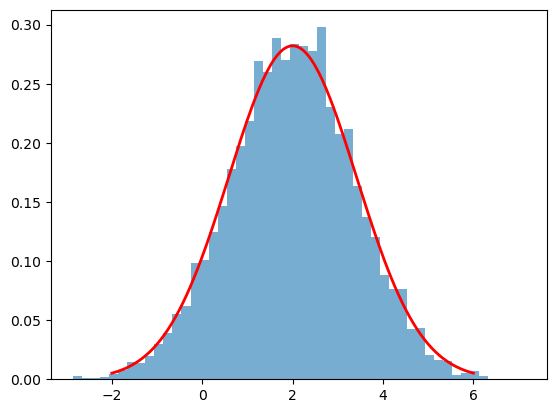

In [1]:
import numpy as np, matplotlib.pyplot as plt, scipy.stats as stats

p = lambda x: stats.norm.pdf(x, 2, np.sqrt(2))
x, samples = 0, []
for _ in range(12000):
    x_new = np.random.normal(x, 1)
    if np.random.rand() < p(x_new)/p(x): x = x_new
    samples.append(x)

plt.hist(samples, bins=50, density=True, alpha=0.6)
xv = np.linspace(-2,6,200)
plt.plot(xv, p(xv), 'r-', lw=2)
plt.show()

It easily produced the right solution. So in this case, AI can come up with the correct solution way faster.

Very easy to get the right solution in the first try, the code is shorter, for example it uses norm for the gaussian and I wrote the whole thing in my solution.

### HW2, problem 1 (4th-order RK for Kepler problem) with e = 0.96

In [2]:
import numpy as np, matplotlib.pyplot as plt

G, M, a = 4*np.pi**2, 1, 1
def accel(r): return -G*M*r/np.linalg.norm(r)**3
def rk4(r, v, dt):
    k1r,k1v = v, accel(r)
    k2r,k2v = v+0.5*dt*k1v, accel(r+0.5*dt*k1r)
    k3r,k3v = v+0.5*dt*k2v, accel(r+0.5*dt*k2r)
    k4r,k4v = v+dt*k3v, accel(r+dt*k3r)
    return r + dt*(k1r+2*k2r+2*k3r+k4r)/6, v + dt*(k1v+2*k2v+2*k3v+k4v)/6
def energy(r, v): return 0.5*np.dot(v,v) - G*M/np.linalg.norm(r)

def simulate(dt):
    rp, vp = a*(1-0.96), np.sqrt(G*M/a*(1+0.96)/(1-0.96))
    r, v, r0, E0 = np.array([0,rp]), np.array([-vp,0]), np.array([0,rp]), energy(np.array([0,rp]), np.array([-vp,0]))
    t, traj = 0, []
    while t<1: r,v = rk4(r,v,dt); traj.append(r.copy()); t+=dt
    return np.array(traj), np.linalg.norm(r-r0), abs(energy(r,v)-E0)

dts = [1/12, 1/48, 1/365.25]
labels = ["1 month", "1 week", "1 day"]

for dt, label in zip(dts, labels):
    traj, rerr, Eerr = simulate(dt)
    print(f"{label}: pos error = {rerr:.2e}, energy error = {Eerr:.2e}")

1 month: pos error = 3.45e+02, energy error = 5.97e+04
1 week: pos error = 9.55e+01, energy error = 4.58e+03
1 day: pos error = 1.23e+01, energy error = 8.27e+01


Again, it generates the exact solutions in the first try (identical prints and values). AI in this case also can come up with the correct solutions faster. Very easy to get the right solution. 

Although I don't like this way of writing it, because the rk4 is specialized for the kepler problem here. In other words if I wanna change the differential equations to something else I need to write a whole new rk4. What I did in my solution I defined the rk4 by its own where it knows nothing about the system, then I defined the function related to my system (which is the kepler equations).

So is the solution correct? Yes ---- Do I think it is a good way to write it liek this? No

### HW1, problem 2 (generating the positions & velocities), no need to do efficiency tests

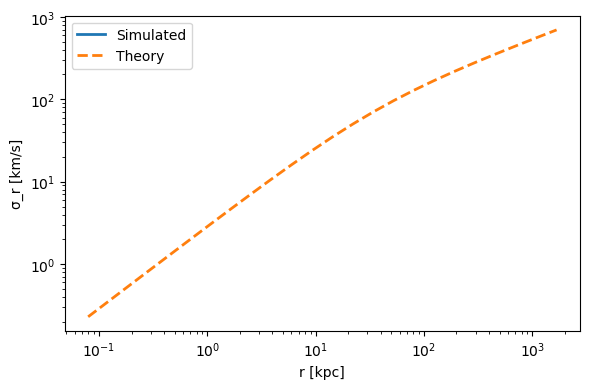

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

G = 4.30091e-6
M = 1e12
a = 35.0
N = 100000

def Phi(r): return -G * M / (r + a)
def M_r(r): return M * r**2 / (r + a)**2
r_vals = np.logspace(-3, 3, 1000)
m_vals = M_r(r_vals) / M
inv_M = interp1d(m_vals, r_vals, bounds_error=False, fill_value="extrapolate")
r = inv_M(np.random.rand(N))
phi_r = Phi(r)

def fE(E):
    x = -E * a / (G * M)
    return np.where((x > 0) & (x < 1),
                    np.sqrt(x) * (1 - x)**2.5,
                    0)

vmax = np.sqrt(2 * np.abs(phi_r))
v = np.zeros(N)
for i in range(N):
    for _ in range(200):
        v_try = np.random.rand() * vmax[i]
        E = phi_r[i] - 0.5 * v_try**2
        if E <= 0: continue
        if np.random.rand() < fE(E) / fE(phi_r[i]):
            v[i] = v_try
            break

theta = np.arccos(2 * np.random.rand(N) - 1)
phi = 2 * np.pi * np.random.rand(N)
vx = v * np.sin(theta) * np.cos(phi)
vy = v * np.sin(theta) * np.sin(phi)
vz = v * np.cos(theta)

vr = (vx * r / r + 0).copy()

logr = np.log10(r)
bins = np.linspace(logr.min(), logr.max(), 25)
bin_idx = np.digitize(logr, bins)
r_mid = 0.5 * (10**bins[:-1] + 10**bins[1:])
sigma_vr = np.array([np.std(vr[bin_idx == i]) for i in range(1, len(bins))])

def sigma_r_Hernquist(r):
    x = r / a
    return np.sqrt(G * M / a) * np.sqrt(x**2 * (1 + x)**3 / (12 * (1 + x)**4))

plt.figure(figsize=(6, 4))
plt.plot(r_mid, sigma_vr, label="Simulated", lw=2)
plt.plot(r_mid, sigma_r_Hernquist(r_mid), '--', label="Theory", lw=2)
plt.xscale('log'); plt.yscale('log')
plt.xlabel("r [kpc]"); plt.ylabel("σ_r [km/s]")
plt.legend()
plt.tight_layout()
plt.show()

Yeah this one is tricky... It just uses some approximations of $f(E)$ & sigma_r_Hernquist. It doens't have an exact analytic inverse for the mass profile, it instead interpolates somehow. And the answer is obviously wrong. 

This is not the exact copy of the initial answer, the initial answer was going through different errors and I passed the errors back for it to fix it. The code runs, but the answer is wrong. I don't think there's a single thing that it is doing wrong that might be the major issue. There are several things going on here in each function.

And to be honest this was one of the hardest problems in the class for me, and it took me a long time to get to something meaningful at least, so I don't blame it here.

#### So overall, AI replaces me in the first two questions to a good level. But the third question not so much. I don't know for sure tho, it might be that I just didn't play around enough with it to get it work.

# Brute force gravity calculation with boundry conditions

Ok so the way I thought about this was that you have many many tiles of the single cube we had in the problem all tiled together.  
In the original setup you only had one cube with N particles, but under periodic boundary conditions it becomes infinite tiles of identical cubes, each holding the same N particles.

Obviously we can’t add up gravity from an infinite number of copies. So what I did is this:

A single particle only feels the pull from the nearest copy of every other particle, so all the far copies are ignored.

Example in 1D:

line length: L = 100  
Particle i is at x = 5  
Particle j is at x = 94

If you treat the line as isolated you woudl take

$
\Delta x = x_j - x_i = 94 - 5 = 89.
$

But in the periodic version there’s a closer copy of j just to the left i.  
We find it by subtracting one whole line length:

$
\Delta x_\text{min} = \Delta x - L
                    = 89 - 100
                    = -11.
$

Meaning that you go the other way but you go less to find the closer version of j which is not in your line.

If we didn’t do this, we would be off by a factor of  

$
\bigl(89 / 11\bigr)^2 \;\approx\; 65
$

in the gravity force magnitude.

### The one‑liner that fixes it

```python
dx -= L * np.round(dx / L)
```
the rounding will tell the code which way it should go basically.

In the example above it would be np.round(89/100) which is 0.89 rounded which is 1.

In [4]:
import numpy as np
import time
from tqdm import tqdm

In [5]:
#Generate positions in 3D
def generate_positions(N, L, seed):
    np.random.seed(seed)
    return np.random.uniform(0, L, (N, 3)).astype(np.float32)

In [6]:
#Direct acceleration calculation
def direct_acceleration_chunked(positions, chunk_size):
    N = len(positions)
    x = positions[:, 0]
    y = positions[:, 1]
    z = positions[:, 2]
    acc = np.zeros_like(positions)
    full_x = x[None, :]
    full_y = y[None, :]
    full_z = z[None, :]
    
    num_chunks = (N + chunk_size - 1) // chunk_size
    for i in tqdm(range(num_chunks), desc="Computing direct accelerations", unit="chunk"):
        start = i * chunk_size
        end = min(start + chunk_size, N)
        cx = x[start:end, None]
        cy = y[start:end, None]
        cz = z[start:end, None]
        dx = cx - full_x
        dy = cy - full_y
        dz = cz - full_z
        dist_sq = dx**2 + dy**2 + dz**2

        np.fill_diagonal(dist_sq[:, start:end], np.inf)
        inv_dist_cube = 1.0 / (dist_sq * np.sqrt(dist_sq))
        
        ax_chunk = np.sum(dx * inv_dist_cube, axis=1)
        ay_chunk = np.sum(dy * inv_dist_cube, axis=1)
        az_chunk = np.sum(dz * inv_dist_cube, axis=1)
        
        acc[start:end, 0] = ax_chunk
        acc[start:end, 1] = ay_chunk
        acc[start:end, 2] = az_chunk
    return acc

In [7]:
#Direct acceleration calculation with periodic boundries
def direct_acceleration_chunked_periodic(positions, L, chunk_size):
    N = len(positions)
    x = positions[:, 0]
    y = positions[:, 1]
    z = positions[:, 2]
    acc = np.zeros_like(positions)
    full_x = x[None, :]
    full_y = y[None, :]
    full_z = z[None, :]
    
    num_chunks = (N + chunk_size - 1) // chunk_size
    for i in tqdm(range(num_chunks), desc="Computing direct accelerations", unit="chunk"):
        start = i * chunk_size
        end = min(start + chunk_size, N)
        cx = x[start:end, None]
        cy = y[start:end, None]
        cz = z[start:end, None]
        dx = cx - full_x
        dy = cy - full_y
        dz = cz - full_z

        #here is the 3 lines for 3 coordinates:
        dx -= L * np.round(dx / L)
        dy -= L * np.round(dy / L)
        dz -= L * np.round(dz / L)

        
        dist_sq = dx**2 + dy**2 + dz**2

        np.fill_diagonal(dist_sq[:, start:end], np.inf)
        inv_dist_cube = 1.0 / (dist_sq * np.sqrt(dist_sq))
        
        ax_chunk = np.sum(dx * inv_dist_cube, axis=1)
        ay_chunk = np.sum(dy * inv_dist_cube, axis=1)
        az_chunk = np.sum(dz * inv_dist_cube, axis=1)
        
        acc[start:end, 0] = ax_chunk
        acc[start:end, 1] = ay_chunk
        acc[start:end, 2] = az_chunk
    return acc

In [8]:
N_values = [10**5]
L = 100.0
seed = 42
chunk_size = 500 
    
for N in N_values:
    print(f"\nN = {N:,}")
    positions = generate_positions(N, L, seed)

    t0 = time.perf_counter()
    acc_vac = direct_acceleration_chunked(positions, chunk_size)
    t1 = time.perf_counter()
    print(f"Vacuum     time: {t1 - t0:8.3f} s")

    t2 = time.perf_counter()
    acc_per = direct_acceleration_chunked_periodic(positions, L, chunk_size)
    t3 = time.perf_counter()
    print(f"Periodic   time: {t3 - t2:8.3f} s")


N = 100,000


Computing direct accelerations: 100%|██████████| 200/200 [04:22<00:00,  1.31s/chunk]


Vacuum     time:  262.496 s


Computing direct accelerations: 100%|██████████| 200/200 [07:08<00:00,  2.14s/chunk]

Periodic   time:  428.178 s


The periodic one takes ~ 60% longer for calculation time. Also, good to mention that this is a whole new system that we solve gravity for, so no need for the final sum of all the forces to be the same. But what is important is, all N-1 particles will be included in the calculation, and they will be included only once, only the nearest copy. In other words, the number of calculations stays the same, the time of the calculation goes up most likely because of finding the nearest copy.

#### Tree method

I might be wrong tho, but I think we can just implement what we had above.
My idea for the tree (barnes hut) method:
When you step down the tree, every time you form the vector $\Delta r = r_\text{node} - r_i$ , just do the one‑liner on each component before you use it:  

```python
dx -= L * round(dx / L)
dy -= L * round(dy / L)
dz -= L * round(dz / L)
```